# Data Wrangling Project - We Rate Dogs

In this project we will go through data wrangling process. Gathering, assessing, and cleaning. 

## Gather

Gathering data from three different sources. Normal csv file which is stored locally in my machine, tsv file saved on Udacity cloud it can be accessed by using Requests library, and txt file for tweet_json. 

**Please note: I applied for Twitter developer account to get the authentication in order to use Twitters' API to get the required data. unfortunately, they did not approve my request. Therefore, i'm going to use the given file tweet_json.txt to complete the project.** 

In [1]:
# Import pandas to get the needed dataframes
import pandas as pd 
import requests
import os
import json
import numpy as np
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

In [75]:
# Read twitter-archive-enhanced, image-predictions and tweet's retweet
# Normal csv file
df=pd.read_csv('twitter-archive-enhanced.csv')
# Tsv files can be read using requests function
# First we should create a folder to the file to be stored locally
img_pred = 'img-predictions'
if not os.path.exists(img_pred):
    os.makedirs(img_pred)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [3]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
# open tweet json file
tweet_json = open("tweet_json.txt", "r")

### 1) twitter-archive-enhanced.csv:

In [76]:
# Check the result of the twitter_archive_enhanced dataframe
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2) img-predictions tsv:

In [6]:
# Check request status of image-predictions tsv file. 200 means OK
response = requests.get(url)
response

<Response [200]>

In [7]:
#Check file content 
response.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [8]:
# Open and save the file in the folder created above in Write Binary mode for image-predictions tsv file
with open(os.path.join(img_pred,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [9]:
# Now we can read the saved file using pandas read_csv 
df_img = pd.read_csv('img-predictions\image-predictions.tsv', sep='\t')

#check the result
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3) Tweet-json API:

In [72]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

9424

In [73]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
571: 801854953262350336
Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 7985

Fail
854: 765371061932261376
Fail
855: 765222098633691136
Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 7599

Fail
1132: 728986383096946689
Fail
1133: 728760639972315136
Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165:

Fail
1406: 699323444782047232
Fail
1407: 699088579889332224
Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439:

Fail
1680: 682032003584274432
Fail
1681: 682003177596559360
Fail
1682: 681981167097122816
Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713:

Fail
1954: 673662677122719744
Fail
1955: 673656262056419329
Fail
1956: 673636718965334016
Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987:

Fail
2228: 668268907921326080
Fail
2229: 668256321989451776
Fail
2230: 668248472370458624
Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261:

Fail
2502: 863553081350529029
Fail
2503: 863471782782697472
Fail
2504: 863432100342583297
Fail
2505: 863427515083354112
Fail
2506: 863079547188785154
Fail
2507: 863062471531167744
Fail
2508: 862831371563274240
Fail
2509: 862722525377298433
Fail
2510: 862457590147678208
Fail
2511: 862096992088072192
Fail
2512: 861769973181624320
Fail
2513: 861383897657036800
Fail
2514: 861288531465048066
Fail
2515: 861005113778896900
Fail
2516: 860981674716409858
Fail
2517: 860924035999428608
Fail
2518: 860563773140209665
Fail
2519: 860524505164394496
Fail
2520: 860276583193509888
Fail
2521: 860184849394610176
Fail
2522: 860177593139703809
Fail
2523: 859924526012018688
Fail
2524: 859851578198683649
Fail
2525: 859607811541651456
Fail
2526: 859196978902773760
Fail
2527: 859074603037188101
Fail
2528: 858860390427611136
Fail
2529: 858843525470990336
Fail
2530: 858471635011153920
Fail
2531: 858107933456039936
Fail
2532: 857989990357356544
Fail
2533: 857746408056729600
Fail
2534: 857393404942143489
Fail
2535:

Fail
2776: 822244816520155136
Fail
2777: 822163064745328640
Fail
2778: 821886076407029760
Fail
2779: 821813639212650496
Fail
2780: 821765923262631936
Fail
2781: 821522889702862852
Fail
2782: 821421320206483457
Fail
2783: 821407182352777218
Fail
2784: 821153421864615936
Fail
2785: 821149554670182400
Fail
2786: 821107785811234820
Fail
2787: 821044531881721856
Fail
2788: 820837357901512704
Fail
2789: 820749716845686786
Fail
2790: 820690176645140481
Fail
2791: 820494788566847489
Fail
2792: 820446719150292993
Fail
2793: 820314633777061888
Fail
2794: 820078625395449857
Fail
2795: 820013781606658049
Fail
2796: 819952236453363712
Fail
2797: 819924195358416896
Fail
2798: 819711362133872643
Fail
2799: 819588359383371776
Fail
2800: 819347104292290561
Fail
2801: 819238181065359361
Fail
2802: 819227688460238848
Fail
2803: 819015337530290176
Fail
2804: 819015331746349057
Fail
2805: 819006400881917954
Fail
2806: 819004803107983360
Fail
2807: 818646164899774465
Fail
2808: 818627210458333184
Fail
2809:

Fail
3050: 786963064373534720
Fail
3051: 786729988674449408
Fail
3052: 786709082849828864
Fail
3053: 786664955043049472
Fail
3054: 786595970293370880
Fail
3055: 786363235746385920
Fail
3056: 786286427768250368
Fail
3057: 786233965241827333
Fail
3058: 786051337297522688
Fail
3059: 786036967502913536
Fail
3060: 785927819176054784
Fail
3061: 785872687017132033
Fail
3062: 785639753186217984
Fail
3063: 785533386513321988
Fail
3064: 785515384317313025
Fail
3065: 785264754247995392
Fail
3066: 785170936622350336
Fail
3067: 784826020293709826
Fail
3068: 784517518371221505
Fail
3069: 784431430411685888
Fail
3070: 784183165795655680
Fail
3071: 784057939640352768
Fail
3072: 783839966405230592
Fail
3073: 783821107061198850
Fail
3074: 783695101801398276
Fail
3075: 783466772167098368
Fail
3076: 783391753726550016
Fail
3077: 783347506784731136
Fail
3078: 783334639985389568
Fail
3079: 783085703974514689
Fail
3080: 782969140009107456
Fail
3081: 782747134529531904
Fail
3082: 782722598790725632
Fail
3083:

Fail
3324: 750381685133418496
Fail
3325: 750147208377409536
Fail
3326: 750132105863102464
Fail
3327: 750117059602808832
Fail
3328: 750101899009982464
Fail
3329: 750086836815486976
Fail
3330: 750071704093859840
Fail
3331: 750056684286914561
Fail
3332: 750041628174217216
Fail
3333: 750026558547456000
Fail
3334: 750011400160841729
Fail
3335: 749996283729883136
Fail
3336: 749981277374128128
Fail
3337: 749774190421639168
Fail
3338: 749417653287129088
Fail
3339: 749403093750648834
Fail
3340: 749395845976588288
Fail
3341: 749317047558017024
Fail
3342: 749075273010798592
Fail
3343: 749064354620928000
Fail
3344: 749036806121881602
Fail
3345: 748977405889503236
Fail
3346: 748932637671223296
Fail
3347: 748705597323898880
Fail
3348: 748699167502000129
Fail
3349: 748692773788876800
Fail
3350: 748575535303884801
Fail
3351: 748568946752774144
Fail
3352: 748346686624440324
Fail
3353: 748337862848962560
Fail
3354: 748324050481647620
Fail
3355: 748307329658011649
Fail
3356: 748220828303695873
Fail
3357:

Fail
3598: 712065007010385924
Fail
3599: 711998809858043904
Fail
3600: 711968124745228288
Fail
3601: 711743778164514816
Fail
3602: 711732680602345472
Fail
3603: 711694788429553666
Fail
3604: 711652651650457602
Fail
3605: 711363825979756544
Fail
3606: 711306686208872448
Fail
3607: 711008018775851008
Fail
3608: 710997087345876993
Fail
3609: 710844581445812225
Fail
3610: 710833117892898816
Fail
3611: 710658690886586372
Fail
3612: 710609963652087808
Fail
3613: 710588934686908417
Fail
3614: 710296729921429505
Fail
3615: 710283270106132480
Fail
3616: 710272297844797440
Fail
3617: 710269109699739648
Fail
3618: 710153181850935296
Fail
3619: 710140971284037632
Fail
3620: 710117014656950272
Fail
3621: 709918798883774466
Fail
3622: 709901256215666688
Fail
3623: 709852847387627521
Fail
3624: 709566166965075968
Fail
3625: 709556954897764353
Fail
3626: 709519240576036864
Fail
3627: 709449600415961088
Fail
3628: 709409458133323776
Fail
3629: 709225125749587968
Fail
3630: 709207347839836162
Fail
3631:

Fail
3872: 690989312272396288
Fail
3873: 690959652130045952
Fail
3874: 690938899477221376
Fail
3875: 690932576555528194
Fail
3876: 690735892932222976
Fail
3877: 690728923253055490
Fail
3878: 690690673629138944
Fail
3879: 690649993829576704
Fail
3880: 690607260360429569
Fail
3881: 690597161306841088
Fail
3882: 690400367696297985
Fail
3883: 690374419777196032
Fail
3884: 690360449368465409
Fail
3885: 690348396616552449
Fail
3886: 690248561355657216
Fail
3887: 690021994562220032
Fail
3888: 690015576308211712
Fail
3889: 690005060500217858
Fail
3890: 689999384604450816
Fail
3891: 689993469801164801
Fail
3892: 689977555533848577
Fail
3893: 689905486972461056
Fail
3894: 689877686181715968
Fail
3895: 689835978131935233
Fail
3896: 689661964914655233
Fail
3897: 689659372465688576
Fail
3898: 689623661272240129
Fail
3899: 689599056876867584
Fail
3900: 689557536375177216
Fail
3901: 689517482558820352
Fail
3902: 689289219123089408
Fail
3903: 689283819090870273
Fail
3904: 689280876073582592
Fail
3905:

Fail
4146: 677547928504967168
Fail
4147: 677530072887205888
Fail
4148: 677335745548390400
Fail
4149: 677334615166730240
Fail
4150: 677331501395156992
Fail
4151: 677328882937298944
Fail
4152: 677314812125323265
Fail
4153: 677301033169788928
Fail
4154: 677269281705472000
Fail
4155: 677228873407442944
Fail
4156: 677187300187611136
Fail
4157: 676975532580409345
Fail
4158: 676957860086095872
Fail
4159: 676949632774234114
Fail
4160: 676948236477857792
Fail
4161: 676946864479084545
Fail
4162: 676942428000112642
Fail
4163: 676936541936185344
Fail
4164: 676916996760600576
Fail
4165: 676897532954456065
Fail
4166: 676864501615042560
Fail
4167: 676821958043033607
Fail
4168: 676819651066732545
Fail
4169: 676811746707918848
Fail
4170: 676776431406465024
Fail
4171: 676617503762681856
Fail
4172: 676613908052996102
Fail
4173: 676606785097199616
Fail
4174: 676603393314578432
Fail
4175: 676593408224403456
Fail
4176: 676590572941893632
Fail
4177: 676588346097852417
Fail
4178: 676582956622721024
Fail
4179:

Fail
4420: 671159727754231808
Fail
4421: 671154572044468225
Fail
4422: 671151324042559489
Fail
4423: 671147085991960577
Fail
4424: 671141549288370177
Fail
4425: 671138694582165504
Fail
4426: 671134062904504320
Fail
4427: 671122204919246848
Fail
4428: 671115716440031232
Fail
4429: 671109016219725825
Fail
4430: 670995969505435648
Fail
4431: 670842764863651840
Fail
4432: 670840546554966016
Fail
4433: 670838202509447168
Fail
4434: 670833812859932673
Fail
4435: 670832455012716544
Fail
4436: 670826280409919488
Fail
4437: 670823764196741120
Fail
4438: 670822709593571328
Fail
4439: 670815497391357952
Fail
4440: 670811965569282048
Fail
4441: 670807719151067136
Fail
4442: 670804601705242624
Fail
4443: 670803562457407488
Fail
4444: 670797304698376195
Fail
4445: 670792680469889025
Fail
4446: 670789397210615808
Fail
4447: 670786190031921152
Fail
4448: 670783437142401025
Fail
4449: 670782429121134593
Fail
4450: 670780561024270336
Fail
4451: 670778058496974848
Fail
4452: 670764103623966721
Fail
4453:

Fail
4694: 666268910803644416
Fail
4695: 666104133288665088
Fail
4696: 666102155909144576
Fail
4697: 666099513787052032
Fail
4698: 666094000022159362
Fail
4699: 666082916733198337
Fail
4700: 666073100786774016
Fail
4701: 666071193221509120
Fail
4702: 666063827256086533
Fail
4703: 666058600524156928
Fail
4704: 666057090499244032
Fail
4705: 666055525042405380
Fail
4706: 666051853826850816
Fail
4707: 666050758794694657
Fail
4708: 666049248165822465
Fail
4709: 666044226329800704
Fail
4710: 666033412701032449
Fail
4711: 666029285002620928
Fail
4712: 666020888022790149
Fail
4713: 892420643555336193
Fail
4714: 892177421306343426
Fail
4715: 891815181378084864
Fail
4716: 891689557279858688
Fail
4717: 891327558926688256
Fail
4718: 891087950875897856
Fail
4719: 890971913173991426
Fail
4720: 890729181411237888
Fail
4721: 890609185150312448
Fail
4722: 890240255349198849
Fail
4723: 890006608113172480
Fail
4724: 889880896479866881
Fail
4725: 889665388333682689
Fail
4726: 889638837579907072
Fail
4727:

Fail
4968: 844223788422217728
Fail
4969: 843981021012017153
Fail
4970: 843856843873095681
Fail
4971: 843604394117681152
Fail
4972: 843235543001513987
Fail
4973: 842892208864923648
Fail
4974: 842846295480000512
Fail
4975: 842765311967449089
Fail
4976: 842535590457499648
Fail
4977: 842163532590374912
Fail
4978: 842115215311396866
Fail
4979: 841833993020538882
Fail
4980: 841680585030541313
Fail
4981: 841439858740625411
Fail
4982: 841320156043304961
Fail
4983: 841314665196081154
Fail
4984: 841077006473256960
Fail
4985: 840761248237133825
Fail
4986: 840728873075638272
Fail
4987: 840698636975636481
Fail
4988: 840696689258311684
Fail
4989: 840632337062862849
Fail
4990: 840370681858686976
Fail
4991: 840268004936019968
Fail
4992: 839990271299457024
Fail
4993: 839549326359670784
Fail
4994: 839290600511926273
Fail
4995: 839239871831150596
Fail
4996: 838952994649550848
Fail
4997: 838921590096166913
Fail
4998: 838916489579200512
Fail
4999: 838831947270979586
Fail
5000: 838561493054533637
Fail
5001:

Fail
5242: 808344865868283904
Fail
5243: 808134635716833280
Fail
5244: 808106460588765185
Fail
5245: 808001312164028416
Fail
5246: 807621403335917568
Fail
5247: 807106840509214720
Fail
5248: 807059379405148160
Fail
5249: 807010152071229440
Fail
5250: 806629075125202948
Fail
5251: 806620845233815552
Fail
5252: 806576416489959424
Fail
5253: 806542213899489280
Fail
5254: 806242860592926720
Fail
5255: 806219024703037440
Fail
5256: 805958939288408065
Fail
5257: 805932879469572096
Fail
5258: 805826884734976000
Fail
5259: 805823200554876929
Fail
5260: 805520635690676224
Fail
5261: 805487436403003392
Fail
5262: 805207613751304193
Fail
5263: 804738756058218496
Fail
5264: 804475857670639616
Fail
5265: 804413760345620481
Fail
5266: 804026241225523202
Fail
5267: 803773340896923648
Fail
5268: 803692223237865472
Fail
5269: 803638050916102144
Fail
5270: 803380650405482500
Fail
5271: 803321560782307329
Fail
5272: 803276597545603072
Fail
5273: 802952499103731712
Fail
5274: 802624713319034886
Fail
5275:

Fail
5516: 772152991789019136
Fail
5517: 772117678702071809
Fail
5518: 772114945936949249
Fail
5519: 772102971039580160
Fail
5520: 771908950375665664
Fail
5521: 771770456517009408
Fail
5522: 771500966810099713
Fail
5523: 771380798096281600
Fail
5524: 771171053431250945
Fail
5525: 771136648247640064
Fail
5526: 771102124360998913
Fail
5527: 771014301343748096
Fail
5528: 771004394259247104
Fail
5529: 770787852854652928
Fail
5530: 770772759874076672
Fail
5531: 770743923962707968
Fail
5532: 770655142660169732
Fail
5533: 770414278348247044
Fail
5534: 770293558247038976
Fail
5535: 770093767776997377
Fail
5536: 770069151037685760
Fail
5537: 769940425801170949
Fail
5538: 769695466921623552
Fail
5539: 769335591808995329
Fail
5540: 769212283578875904
Fail
5541: 768970937022709760
Fail
5542: 768909767477751808
Fail
5543: 768855141948723200
Fail
5544: 768609597686943744
Fail
5545: 768596291618299904
Fail
5546: 768554158521745409
Fail
5547: 768473857036525572
Fail
5548: 768193404517830656
Fail
5549:

Fail
5790: 739544079319588864
Fail
5791: 739485634323156992
Fail
5792: 739238157791694849
Fail
5793: 738891149612572673
Fail
5794: 738885046782832640
Fail
5795: 738883359779196928
Fail
5796: 738537504001953792
Fail
5797: 738402415918125056
Fail
5798: 738184450748633089
Fail
5799: 738166403467907072
Fail
5800: 738156290900254721
Fail
5801: 737826014890496000
Fail
5802: 737800304142471168
Fail
5803: 737678689543020544
Fail
5804: 737445876994609152
Fail
5805: 737322739594330112
Fail
5806: 737310737551491075
Fail
5807: 736736130620620800
Fail
5808: 736392552031657984
Fail
5809: 736365877722001409
Fail
5810: 736225175608430592
Fail
5811: 736010884653420544
Fail
5812: 735991953473572864
Fail
5813: 735648611367784448
Fail
5814: 735635087207878657
Fail
5815: 735274964362878976
Fail
5816: 735256018284875776
Fail
5817: 735137028879360001
Fail
5818: 734912297295085568
Fail
5819: 734787690684657664
Fail
5820: 734776360183431168
Fail
5821: 734559631394082816
Fail
5822: 733828123016450049
Fail
5823:

Fail
6064: 704054845121142784
Fail
6065: 703774238772166656
Fail
6066: 703769065844768768
Fail
6067: 703631701117943808
Fail
6068: 703611486317502464
Fail
6069: 703425003149250560
Fail
6070: 703407252292673536
Fail
6071: 703382836347330562
Fail
6072: 703356393781329922
Fail
6073: 703268521220972544
Fail
6074: 703079050210877440
Fail
6075: 703041949650034688
Fail
6076: 702932127499816960
Fail
6077: 702899151802126337
Fail
6078: 702684942141153280
Fail
6079: 702671118226825216
Fail
6080: 702598099714314240
Fail
6081: 702539513671897089
Fail
6082: 702332542343577600
Fail
6083: 702321140488925184
Fail
6084: 702276748847800320
Fail
6085: 702217446468493312
Fail
6086: 701981390485725185
Fail
6087: 701952816642965504
Fail
6088: 701889187134500865
Fail
6089: 701805642395348998
Fail
6090: 701601587219795968
Fail
6091: 701570477911896070
Fail
6092: 701545186879471618
Fail
6093: 701214700881756160
Fail
6094: 700890391244103680
Fail
6095: 700864154249383937
Fail
6096: 700847567345688576
Fail
6097:

Fail
6338: 684830982659280897
Fail
6339: 684800227459624960
Fail
6340: 684594889858887680
Fail
6341: 684588130326986752
Fail
6342: 684567543613382656
Fail
6343: 684538444857667585
Fail
6344: 684481074559381504
Fail
6345: 684460069371654144
Fail
6346: 684241637099323392
Fail
6347: 684225744407494656
Fail
6348: 684222868335505415
Fail
6349: 684200372118904832
Fail
6350: 684195085588783105
Fail
6351: 684188786104872960
Fail
6352: 684177701129875456
Fail
6353: 684147889187209216
Fail
6354: 684122891630342144
Fail
6355: 684097758874210310
Fail
6356: 683857920510050305
Fail
6357: 683852578183077888
Fail
6358: 683849932751646720
Fail
6359: 683834909291606017
Fail
6360: 683828599284170753
Fail
6361: 683773439333797890
Fail
6362: 683742671509258241
Fail
6363: 683515932363329536
Fail
6364: 683498322573824003
Fail
6365: 683481228088049664
Fail
6366: 683462770029932544
Fail
6367: 683449695444799489
Fail
6368: 683391852557561860
Fail
6369: 683357973142474752
Fail
6370: 683142553609318400
Fail
6371:

Fail
6612: 674670581682434048
Fail
6613: 674664755118911488
Fail
6614: 674646392044941312
Fail
6615: 674644256330530816
Fail
6616: 674638615994089473
Fail
6617: 674632714662858753
Fail
6618: 674606911342424069
Fail
6619: 674468880899788800
Fail
6620: 674447403907457024
Fail
6621: 674436901579923456
Fail
6622: 674422304705744896
Fail
6623: 674416750885273600
Fail
6624: 674410619106390016
Fail
6625: 674394782723014656
Fail
6626: 674372068062928900
Fail
6627: 674330906434379776
Fail
6628: 674318007229923329
Fail
6629: 674307341513269249
Fail
6630: 674291837063053312
Fail
6631: 674271431610523648
Fail
6632: 674269164442398721
Fail
6633: 674265582246694913
Fail
6634: 674262580978937856
Fail
6635: 674255168825880576
Fail
6636: 674082852460433408
Fail
6637: 674075285688614912
Fail
6638: 674063288070742018
Fail
6639: 674053186244734976
Fail
6640: 674051556661161984
Fail
6641: 674045139690631169
Fail
6642: 674042553264685056
Fail
6643: 674038233588723717
Fail
6644: 674036086168010753
Fail
6645:

Fail
6886: 669324657376567296
Fail
6887: 669216679721873412
Fail
6888: 669214165781868544
Fail
6889: 669203728096960512
Fail
6890: 669037058363662336
Fail
6891: 669015743032369152
Fail
6892: 669006782128353280
Fail
6893: 669000397445533696
Fail
6894: 668994913074286592
Fail
6895: 668992363537309700
Fail
6896: 668989615043424256
Fail
6897: 668988183816871936
Fail
6898: 668986018524233728
Fail
6899: 668981893510119424
Fail
6900: 668979806671884288
Fail
6901: 668975677807423489
Fail
6902: 668967877119254528
Fail
6903: 668960084974809088
Fail
6904: 668955713004314625
Fail
6905: 668932921458302977
Fail
6906: 668902994700836864
Fail
6907: 668892474547511297
Fail
6908: 668872652652679168
Fail
6909: 668852170888998912
Fail
6910: 668826086256599040
Fail
6911: 668815180734689280
Fail
6912: 668779399630725120
Fail
6913: 668655139528511488
Fail
6914: 668645506898350081
Fail
6915: 668643542311546881
Fail
6916: 668641109086707712
Fail
6917: 668636665813057536
Fail
6918: 668633411083464705
Fail
6919:

Fail
7160: 874434818259525634
Fail
7161: 874296783580663808
Fail
7162: 874057562936811520
Fail
7163: 874012996292530176
Fail
7164: 873697596434513921
Fail
7165: 873580283840344065
Fail
7166: 873337748698140672
Fail
7167: 873213775632977920
Fail
7168: 872967104147763200
Fail
7169: 872820683541237760
Fail
7170: 872668790621863937
Fail
7171: 872620804844003328
Fail
7172: 872486979161796608
Fail
7173: 872261713294495745
Fail
7174: 872122724285648897
Fail
7175: 871879754684805121
Fail
7176: 871762521631449091
Fail
7177: 871515927908634625
Fail
7178: 871166179821445120
Fail
7179: 871102520638267392
Fail
7180: 871032628920680449
Fail
7181: 870804317367881728
Fail
7182: 870726314365509632
Fail
7183: 870656317836468226
Fail
7184: 870374049280663552
Fail
7185: 870308999962521604
Fail
7186: 870063196459192321
Fail
7187: 869988702071779329
Fail
7188: 869772420881756160
Fail
7189: 869702957897576449
Fail
7190: 869596645499047938
Fail
7191: 869227993411051520
Fail
7192: 868880397819494401
Fail
7193:

Fail
7434: 829011960981237760
Fail
7435: 828801551087042563
Fail
7436: 828770345708580865
Fail
7437: 828708714936930305
Fail
7438: 828650029636317184
Fail
7439: 828409743546925057
Fail
7440: 828408677031882754
Fail
7441: 828381636999917570
Fail
7442: 828376505180889089
Fail
7443: 828372645993398273
Fail
7444: 828361771580813312
Fail
7445: 828046555563323392
Fail
7446: 828011680017821696
Fail
7447: 827933404142436356
Fail
7448: 827653905312006145
Fail
7449: 827600520311402496
Fail
7450: 827324948884643840
Fail
7451: 827228250799742977
Fail
7452: 827199976799354881
Fail
7453: 826958653328592898
Fail
7454: 826848821049180160
Fail
7455: 826615380357632002
Fail
7456: 826598799820865537
Fail
7457: 826598365270007810
Fail
7458: 826476773533745153
Fail
7459: 826240494070030336
Fail
7460: 826204788643753985
Fail
7461: 826115272272650244
Fail
7462: 825876512159186944
Fail
7463: 825829644528148480
Fail
7464: 825535076884762624
Fail
7465: 825147591692263424
Fail
7466: 825120256414846976
Fail
7467:

Fail
7708: 793256262322548741
Fail
7709: 793241302385262592
Fail
7710: 793226087023144960
Fail
7711: 793210959003287553
Fail
7712: 793195938047070209
Fail
7713: 793180763617361921
Fail
7714: 793165685325201412
Fail
7715: 793150605191548928
Fail
7716: 793135492858580992
Fail
7717: 793120401413079041
Fail
7718: 792913359805018113
Fail
7719: 792883833364439040
Fail
7720: 792773781206999040
Fail
7721: 792394556390137856
Fail
7722: 792050063153438720
Fail
7723: 791821351946420224
Fail
7724: 791784077045166082
Fail
7725: 791780927877898241
Fail
7726: 791774931465953280
Fail
7727: 791672322847637504
Fail
7728: 791406955684368384
Fail
7729: 791312159183634433
Fail
7730: 791026214425268224
Fail
7731: 790987426131050500
Fail
7732: 790946055508652032
Fail
7733: 790723298204217344
Fail
7734: 790698755171364864
Fail
7735: 790581949425475584
Fail
7736: 790337589677002753
Fail
7737: 790277117346975746
Fail
7738: 790227638568808452
Fail
7739: 789986466051088384
Fail
7740: 789960241177853952
Fail
7741:

Fail
7982: 757400162377592832
Fail
7983: 757393109802180609
Fail
7984: 757354760399941633
Fail
7985: 756998049151549440
Fail
7986: 756939218950160384
Fail
7987: 756651752796094464
Fail
7988: 756526248105566208
Fail
7989: 756303284449767430
Fail
7990: 756288534030475264
Fail
7991: 756275833623502848
Fail
7992: 755955933503782912
Fail
7993: 755206590534418437
Fail
7994: 755110668769038337
Fail
7995: 754874841593970688
Fail
7996: 754856583969079297
Fail
7997: 754747087846248448
Fail
7998: 754482103782404096
Fail
7999: 754449512966619136
Fail
8000: 754120377874386944
Fail
8001: 754011816964026368
Fail
8002: 753655901052166144
Fail
8003: 753420520834629632
Fail
8004: 753398408988139520
Fail
8005: 753375668877008896
Fail
8006: 753298634498793472
Fail
8007: 753294487569522689
Fail
8008: 753039830821511168
Fail
8009: 753026973505581056
Fail
8010: 752932432744185856
Fail
8011: 752917284578922496
Fail
8012: 752701944171524096
Fail
8013: 752682090207055872
Fail
8014: 752660715232722944
Fail
8015:

Fail
8256: 718460005985447936
Fail
8257: 718454725339934721
Fail
8258: 718246886998687744
Fail
8259: 718234618122661888
Fail
8260: 717841801130979328
Fail
8261: 717790033953034240
Fail
8262: 717537687239008257
Fail
8263: 717428917016076293
Fail
8264: 717421804990701568
Fail
8265: 717047459982213120
Fail
8266: 717009362452090881
Fail
8267: 716802964044845056
Fail
8268: 716791146589110272
Fail
8269: 716730379797970944
Fail
8270: 716447146686459905
Fail
8271: 716439118184652801
Fail
8272: 716285507865542656
Fail
8273: 716080869887381504
Fail
8274: 715928423106027520
Fail
8275: 715758151270801409
Fail
8276: 715733265223708672
Fail
8277: 715704790270025728
Fail
8278: 715696743237730304
Fail
8279: 715680795826982913
Fail
8280: 715360349751484417
Fail
8281: 715342466308784130
Fail
8282: 715220193576927233
Fail
8283: 715200624753819648
Fail
8284: 715009755312439296
Fail
8285: 714982300363173890
Fail
8286: 714962719905021952
Fail
8287: 714957620017307648
Fail
8288: 714631576617938945
Fail
8289:

Fail
8530: 694925794720792577
Fail
8531: 694905863685980160
Fail
8532: 694669722378485760
Fail
8533: 694356675654983680
Fail
8534: 694352839993344000
Fail
8535: 694342028726001664
Fail
8536: 694329668942569472
Fail
8537: 694206574471057408
Fail
8538: 694183373896572928
Fail
8539: 694001791655137281
Fail
8540: 693993230313091072
Fail
8541: 693942351086120961
Fail
8542: 693647888581312512
Fail
8543: 693644216740769793
Fail
8544: 693642232151285760
Fail
8545: 693629975228977152
Fail
8546: 693622659251335168
Fail
8547: 693590843962331137
Fail
8548: 693582294167244802
Fail
8549: 693486665285931008
Fail
8550: 693280720173801472
Fail
8551: 693267061318012928
Fail
8552: 693262851218264065
Fail
8553: 693231807727280129
Fail
8554: 693155686491000832
Fail
8555: 693109034023534592
Fail
8556: 693095443459342336
Fail
8557: 692919143163629568
Fail
8558: 692905862751522816
Fail
8559: 692901601640583168
Fail
8560: 692894228850999298
Fail
8561: 692828166163931137
Fail
8562: 692752401762250755
Fail
8563:

Fail
8804: 679729593985699840
Fail
8805: 679722016581222400
Fail
8806: 679530280114372609
Fail
8807: 679527802031484928
Fail
8808: 679511351870550016
Fail
8809: 679503373272485890
Fail
8810: 679475951516934144
Fail
8811: 679462823135686656
Fail
8812: 679405845277462528
Fail
8813: 679158373988876288
Fail
8814: 679148763231985668
Fail
8815: 679132435750195208
Fail
8816: 679111216690831360
Fail
8817: 679062614270468097
Fail
8818: 679047485189439488
Fail
8819: 679001094530465792
Fail
8820: 678991772295516161
Fail
8821: 678969228704284672
Fail
8822: 678800283649069056
Fail
8823: 678798276842360832
Fail
8824: 678774928607469569
Fail
8825: 678767140346941444
Fail
8826: 678764513869611008
Fail
8827: 678755239630127104
Fail
8828: 678740035362037760
Fail
8829: 678708137298427904
Fail
8830: 678675843183484930
Fail
8831: 678643457146150913
Fail
8832: 678446151570427904
Fail
8833: 678424312106393600
Fail
8834: 678410210315247616
Fail
8835: 678399652199309312
Fail
8836: 678396796259975168
Fail
8837:

Fail
9078: 672254177670729728
Fail
9079: 672248013293752320
Fail
9080: 672245253877968896
Fail
9081: 672239279297454080
Fail
9082: 672231046314901505
Fail
9083: 672222792075620352
Fail
9084: 672205392827572224
Fail
9085: 672169685991993344
Fail
9086: 672160042234327040
Fail
9087: 672139350159835138
Fail
9088: 672125275208069120
Fail
9089: 672095186491711488
Fail
9090: 672082170312290304
Fail
9091: 672068090318987265
Fail
9092: 671896809300709376
Fail
9093: 671891728106971137
Fail
9094: 671882082306625538
Fail
9095: 671879137494245376
Fail
9096: 671874878652489728
Fail
9097: 671866342182637568
Fail
9098: 671855973984772097
Fail
9099: 671789708968640512
Fail
9100: 671768281401958400
Fail
9101: 671763349865160704
Fail
9102: 671744970634719232
Fail
9103: 671743150407421952
Fail
9104: 671735591348891648
Fail
9105: 671729906628341761
Fail
9106: 671561002136281088
Fail
9107: 671550332464455680
Fail
9108: 671547767500775424
Fail
9109: 671544874165002241
Fail
9110: 671542985629241344
Fail
9111:

Fail
9352: 667200525029539841
Fail
9353: 667192066997374976
Fail
9354: 667188689915760640
Fail
9355: 667182792070062081
Fail
9356: 667177989038297088
Fail
9357: 667176164155375616
Fail
9358: 667174963120574464
Fail
9359: 667171260800061440
Fail
9360: 667165590075940865
Fail
9361: 667160273090932737
Fail
9362: 667152164079423490
Fail
9363: 667138269671505920
Fail
9364: 667119796878725120
Fail
9365: 667090893657276420
Fail
9366: 667073648344346624
Fail
9367: 667070482143944705
Fail
9368: 667065535570550784
Fail
9369: 667062181243039745
Fail
9370: 667044094246576128
Fail
9371: 667012601033924608
Fail
9372: 666996132027977728
Fail
9373: 666983947667116034
Fail
9374: 666837028449972224
Fail
9375: 666835007768551424
Fail
9376: 666826780179869698
Fail
9377: 666817836334096384
Fail
9378: 666804364988780544
Fail
9379: 666786068205871104
Fail
9380: 666781792255496192
Fail
9381: 666776908487630848
Fail
9382: 666739327293083650
Fail
9383: 666701168228331520
Fail
9384: 666691418707132416
Fail
9385:

**Since we fail to get the tweets via Twitter API as shown above, we will read it manually**

In [10]:
# read tweet_json txt file
tweet_json.readline()

'{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"med

**NOTE: I CONVERTED TWEET_JSON.TXT INTO TWEET.JSON USING NOTEPAD++ IN ORDER TO USE READ_JSON FUNCTION GIVEN BY PANDAS.**

In [11]:
# read tweet json file using read_json function
tweet_df = pd.read_json('tweet.json', lines=True) 

## Assess

At this stage, we will look to each dataframe collected above and assess them visually and programmatically. Assessment process involves both quality and tidiness. where quality issues include duplicated values, missing values etc. And tidiness issues related to dataframe structrual problems.  

#### Visual Assessment
Simply, visual assessment is considered to assess your data visually by your eye. We can see issues related to quality or tidness by visualizing a sample of the data given. 

### 1) Twitter enahnced csv:

In [12]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


**Quality issues**:
- Columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp having missing values. 	
- Columns name, doggo, floofer, pupper, puppo having None values. 
- Name column has some dummy names as shown above "a". Meaningless.
- column source includes a href html tag which can be removed. 

**Tidness issues**:
- Since we do not need anything related to retweets in this dataframe, and it has missing values. retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp	are meaningless. we can drop them.
- There are 4 columns representing dogs' life categories, which breaks the tidy data requirements. There should be a column called "dog_category" for example to distnguish them. 
- Since rating_denominator has only one value (Based on projects' scenario). This column is useless. 

### 2) Image predictions tsv:

In [13]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


**Tidiness:**
- There are three probabilities of dog category. 

### 3) twitter json file:

In [14]:
tweet_df = tweet_df[['id', 'favorite_count', 'retweet_count']]
tweet_df.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


**Nothing to assess here since we are going to take only tweet_id, favorite_count, and retweet_count**

#### Programmatic Assessment
This part will show assessment using pandas functions instead of visualizing manually. It is considered more accurate.

### 1)Twitter enhanced csv:

In [15]:
# using info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# using describe funtion
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
# using sample function
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
650,792883833364439040,NaN,NaN,2016-10-31 00:20:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bailey. She's rather h*ckin hype for H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792883833...,12,10,Bailey,None,None,None,None
1678,682047327939461121,NaN,NaN,2015-12-30 03:55:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate bears but this one seem...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682047327...,10,10,None,None,None,None,None
1796,677301033169788928,NaN,NaN,2015-12-17 01:35:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Juckson. He's totally on his way to a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677301033...,5,10,Juckson,None,None,None,None
2211,668614819948453888,NaN,NaN,2015-11-23 02:19:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a horned dog. Much grace. Can jump ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668614819...,7,10,a,None,None,None,None
1396,699788877217865730,NaN,NaN,2016-02-17 02:54:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Nala. She's a Freckled High Brusc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699788877...,12,10,Nala,None,None,None,None


In [18]:
# check for duplicated rows
df[df.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [19]:
# check unique values for denominator and numerator 
print(df['rating_denominator'].unique())
print(df['rating_numerator'].unique())

[ 10   0  15  70   7  11 150 170  20  50  90  80  40 130 110  16 120   2]
[  13   12   14    5   17   11   10  420  666    6   15  182  960    0
   75    7   84    9   24    8    1   27    3    4  165 1776  204   50
   99   80   45   60   44  143  121   20   26    2  144   88]


### 2) Image predictions tsv:

In [20]:
# using info function
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
# using describe funtion
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# check duplicated rows
df_img[df_img.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### 3) tweet json:

In [23]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [24]:
tweet_df.describe()

,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [25]:
# sample of the data
tweet_df.sample(5)

,id,favorite_count,retweet_count
1134,728387165835677696,3999,1075
2141,669970042633789440,317,65
634,793601777308463104,8926,1908
1807,676864501615042560,2294,808
1558,688519176466644993,2520,825


**Nothing to assess here since we are going to take only tweet_id, favorite_count, and retweet_count**

### Summary:
**Quality**: 
- Missing values as obsereved above. For in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns. 
- Timestamp should be datetime data type not object in tweet-archive-enahnced csv. 
- Timestamp column has "0000" at the end of each value in tweet-archive-enahnced csv.
- Outliers in rating_numerator and rating_denominator since we have max value 1776 for numerator and max value 170 of rating_numerator. 
- rating_denominator must be 10 since its a fixed value.
- source column in twitter enhanced dataframe is not clear. 
- some dogs names are meaningless. ex: a.
- some columns need to be renamed. ex: timestamp.

**Tidness issues**:
- There are 4 columns representing dogs' life categories, which breaks the tidy data requirements. There should be a column called "dog_category" for example to distnguish them. 
- We can combine all 3 dataframes into one dataframe having all needed data. To make it easier for us at the analysis phase.
- There are three probabilities of dog category in image-predictions dataframe.  **Won't be cleaned**

## Clean

In this section, we will start cleaning issues written above in assessment section. 
Cleaning process includes: 
- Define what will be cleaned. 
- Convert what will be cleaned into code. 
- Test the cleaned code.

**Copies of dataframes**

In [26]:
# copy of twitter archive csv
df_copy = df.copy()
#copy of image predictions 
df_img_copy = df_img.copy()
#copy of tweet json
tweet_df_copy = tweet_df.copy()

**Quality issues:**

### Missing values

#### Define

Drop columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in tweet archive enhanced dataframe, since they have alot of missing values and they are meaningless in terms of analysis. in addition to drop rows with nun empty values. 

#### Code

In [103]:
# remove rows of retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp with non empty values 
df = df[~df['retweeted_status_id'].notnull()]
df = df[~df['retweeted_status_user_id'].notnull()]
df = df[~df['retweeted_status_timestamp'].notnull()]

In [104]:
# remove rows of in_reply_to_status_id with non empty values 
df = df[~df['in_reply_to_status_id'].notnull()]

In [105]:
#drop missing values columns 
df = df.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [106]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [107]:
df.shape

(2097, 12)

number of columns reduced after removing rows with non empty values of retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp and in_reply_to_status_id.

#### Define

Convert timestamp column in tweet-enhanced-csv to datetime datatype. 

#### Code

In [29]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Test

In [30]:
df['timestamp'].dtype

datetime64[ns, UTC]

#### Define

Remove "0000" at the end of each value on timestamp column in tweet-archive-enahnced csv.

#### Code

In [31]:
# Remove '+0000' at the end of  timestamp column
# we need to convert it first to string in order to perform this operation
df['timestamp'] = df['timestamp'].astype(str).str[:-6]

In [32]:
# convert it back to date time
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Test

In [33]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define

- Replace outliers in rating_numerator with mean value. since we have max value 1776 for numerator. numerator can not be less than 10.(based on project scenario) and not greater than 20

#### Code

In [110]:
# extract rating numerator
ratings = df.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
...,...,...
2351,5,10
2352,6,10
2353,9,10
2354,7,10


In [115]:
# assign rating numerator to ratings calculated above
df.rating_numerator = ratings.astype(float)

#### Test

In [116]:
# check rating_numertaor values 
df.rating_numerator.unique()

array([1.300e+01, 1.200e+01, 1.400e+01, 1.350e+01, 1.100e+01, 6.000e+00,
       1.000e+01, 0.000e+00, 8.400e+01, 2.400e+01, 9.750e+00, 5.000e+00,
       1.127e+01, 3.000e+00, 7.000e+00, 8.000e+00, 9.000e+00, 4.000e+00,
       1.650e+02, 1.776e+03, 2.040e+02, 5.000e+01, 9.900e+01, 8.000e+01,
       4.500e+01, 6.000e+01, 4.400e+01, 1.210e+02, 1.126e+01, 2.000e+00,
       1.440e+02, 8.800e+01, 1.000e+00, 4.200e+02])

#### Define

Replace all values for rating_denominator with 10 only.

#### Code

In [40]:
# replace all values with 10
df['rating_denominator'] = np.where(df['rating_denominator'],10, df['rating_denominator'])

#### Test

In [41]:
# check rating_denominator values 
df['rating_denominator'].unique()

array([10,  0], dtype=int64)

#### Define

categorize values of tweet source into iphone, web, vine, and tweetdeck.

#### Code

In [42]:
# view source unique values
df['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [43]:
# replace values with categoraized items. 
df['source'].replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'iPhone', '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Web','<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine', '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'TweetDeck'}, inplace=True)

#### Test

In [44]:
# check values
df['source'].unique()

array(['iPhone', 'Web', 'Vine', 'TweetDeck'], dtype=object)

#### Define

Remove rows with meaningless name. ex: a, None etc.
**I have filtered the names in Excel to make it easier for me.**

#### Code

In [45]:
df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [46]:
# names with lowercase letter at the begining will be changed to None
names=[]

# if statement to see if the first letter is lowecsase append None instead of it.
def incorrect_name(row):
    if row['name'][0].islower() == True:
        names.append('None')
    else:
        names.append(row['name'])
        
# call function using pandas apply by columns
df.apply(incorrect_name, axis=1)


#add names list to  dataframe and check dataframe
df['names'] = names
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,Phineas
1,892177421306343426,2017-08-01 00:17:27,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,Tilly
2,891815181378084864,2017-07-31 00:18:03,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,Archie
3,891689557279858688,2017-07-30 15:58:51,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,Darla
4,891327558926688256,2017-07-29 16:00:24,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,Franklin


In [47]:
# update original name column with the new values 
df['name'] = df['names']

In [48]:
# drop names column 
df = df.drop('names', axis=1)

#### Test

In [49]:
# check name column is updated correctly.
df['name'].value_counts()

None       854
Charlie     12
Lucy        11
Oliver      11
Cooper      11
          ... 
Rudy         1
Marq         1
Schnozz      1
Stuart       1
Scott        1
Name: name, Length: 932, dtype: int64

#### Define

Rename columns timestamp and name to created_at and dog_name

#### Code

In [50]:
df = df.rename(columns={"timestamp": "created_at", "name": "dog_name"})

#### Test

In [51]:
df.head(1)

,tweet_id,created_at,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


**Tidiness issues:**

#### Define

Make dog stages in one column called dog_stage. Instead of making each one in seperate column. 

#### Code

In [117]:
# find values of 4 dog types
df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1761
1,None,None,None,puppo,23
2,None,None,pupper,None,221
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,9
7,doggo,floofer,None,None,1


In [118]:
# convert None into empty string of each column 
df.doggo.replace('None', '', inplace=True)
df.floofer.replace('None', '', inplace=True)
df.pupper.replace('None', '', inplace=True)
df.puppo.replace('None', '', inplace=True)

# check again
df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1761
1,,,,puppo,23
2,,,pupper,,221
3,,floofer,,,9
4,doggo,,,,72
5,doggo,,,puppo,1
6,doggo,,pupper,,9
7,doggo,floofer,,,1


In [119]:
# define new column "dog_stage" with values of each dog stage/type
df['dog_stage'] = df.doggo + df.floofer + df.pupper + df.puppo
df.loc[df.dog_stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df.loc[df.dog_stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df.loc[df.dog_stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test

In [120]:
# check the results 
df.stage.value_counts()

doggo, pupper     9
doggo, floofer    1
doggo, puppo      1
Name: stage, dtype: int64

#### Defnie

Combine needed columns in(twitter-enhanced, image-predictions, twitter-json) into one dataframe called master df.

#### Code 

In [131]:
# first we will merge both enhanced and image dataframes 
df_img_tweet = df.merge(df_img, left_on='tweet_id', right_on='tweet_id')

In [132]:
# now merge them all together with tweet-json
master_df = tweet_df.merge(df_img_tweet, left_on='id', right_on='tweet_id')

In [133]:
# drop tweet id column since it will repeated
master_df.drop(columns='tweet_id', inplace=True)

#### Test

In [134]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1971 non-null   int64  
 1   favorite_count      1971 non-null   int64  
 2   retweet_count       1971 non-null   int64  
 3   timestamp           1971 non-null   object 
 4   source              1971 non-null   object 
 5   text                1971 non-null   object 
 6   expanded_urls       1971 non-null   object 
 7   rating_numerator    1971 non-null   float64
 8   rating_denominator  1971 non-null   int64  
 9   name                1971 non-null   object 
 10  doggo               1971 non-null   object 
 11  floofer             1971 non-null   object 
 12  pupper              1971 non-null   object 
 13  puppo               1971 non-null   object 
 14  dog_stage           1971 non-null   object 
 15  stage               10 non-null     object 
 16  jpg_ur

### Analysis 

In this section we will proceed with our master dataframe to analyze it and get insights from it.

In [135]:
# Import need libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [136]:
# save master dataframe to csv 
master_df.to_csv ('twitter_archive_master.csv', index = False, header=True)

In [137]:
# summary of the data
master_df.describe()

,id,favorite_count,retweet_count,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf
count,1.971000e+03,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1971.000000,1.971000e+03,1.971000e+03
mean,7.360418e+17,8949.106545,2784.449518,12.178985,10.477423,1.201928,0.594558,1.345850e-01,6.016556e-02
std,6.752810e+16,12267.799790,4697.662893,41.607230,6.853275,0.559020,0.272126,1.010527e-01,5.094156e-02
min,6.660209e+17,81.000000,16.000000,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758656e+17,1997.000000,628.500000,10.000000,10.000000,1.000000,0.363091,5.339800e-02,1.608055e-02
50%,7.088343e+17,4147.000000,1367.000000,11.000000,10.000000,1.000000,0.587764,1.173970e-01,4.944380e-02
75%,7.880951e+17,11402.500000,3239.000000,12.000000,10.000000,1.000000,0.847827,1.955655e-01,9.153815e-02
max,8.924206e+17,132810.000000,79515.000000,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


1) On average, what dog stage/type considered the best based on We rate dogs rating?

In [138]:
doggo_mean = master_df.query('dog_stage == "doggo"')['rating_numerator'].mean()
puppo_mean = master_df.query('dog_stage == "puppo"')['rating_numerator'].mean()
pupper_mean = master_df.query('dog_stage == "pupper"')['rating_numerator'].mean()
floofer_mean = master_df.query('dog_stage == "floofer"')['rating_numerator'].mean()

print(doggo_mean)
print(puppo_mean)
print(pupper_mean)
print(floofer_mean)

11.88888888888889
12.0
10.6381592039801
12.0


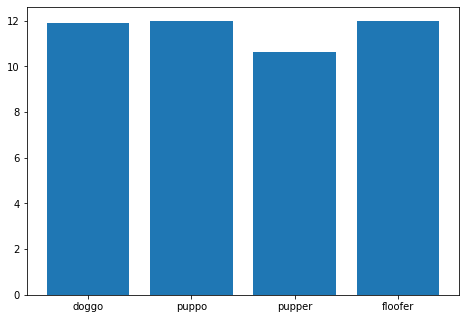

In [139]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
dog_type = ['doggo', 'puppo' ,'pupper', 'floofer']
rating_avg = [doggo_mean,puppo_mean,pupper_mean,floofer_mean]
ax.bar(dog_type,rating_avg)
plt.show()

Maybe the bar chart is not clear enough but, we can see from the calculated averages above that **Puppo** and **floofer** are considered the best rated dog based on we rate dogs account.

2) based on dog type, who has the most retweets? 

In [189]:
master_df.groupby('dog_stage')['retweet_count'].count()

dog_stage
                1668
doggo             63
doggofloofer       1
doggopupper        8
doggopuppo         1
floofer            7
pupper           201
puppo             22
Name: retweet_count, dtype: int64

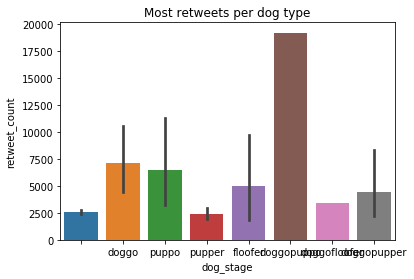

In [187]:
sns.barplot(x="dog_stage", y="retweet_count", data=master_df).set_title("Most retweets per dog type");

**pupper** is considered the most retweeted dog type.

3) based on dog type, who has the most favorites? 

In [194]:
master_df.groupby('dog_stage')['favorite_count'].count()

dog_stage
                1668
doggo             63
doggofloofer       1
doggopupper        8
doggopuppo         1
floofer            7
pupper           201
puppo             22
Name: favorite_count, dtype: int64

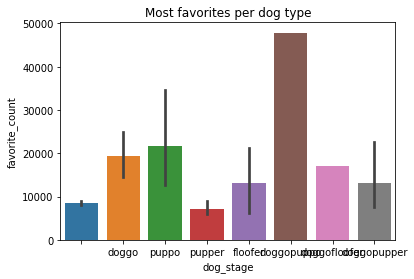

In [186]:
sns.barplot(x="dog_stage", y="favorite_count", data=master_df ).set_title("Most favorites per dog type");

**Pupper** is considered most favorited as shown above in the barchart.